<a href="https://colab.research.google.com/github/Abhi-nav0506/Coronary-Heart-Disease-Prediction/blob/main/Cardio_Vascular_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from plotnine import ggplot
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cardio_risk_df = pd.read_csv('/content/drive/MyDrive/Copy of data_cardiovascular_risk.csv')

In [ ]:
cardio_risk_df

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0


In [ ]:
cardio_risk_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [8]:
# FEATURES WITH NULL VALUES:

null_value_features = cardio_risk_df.isna().sum().reset_index()
null_value_features = null_value_features[null_value_features[0] != 0].reset_index().drop('level_0',axis=1).rename(columns={0:'null_values','index':'feature'})
null_value_features

,feature,null_values
0,education,87
1,cigsPerDay,22
2,BPMeds,44
3,totChol,38
4,BMI,14
5,heartRate,1
6,glucose,304


In [ ]:
cardio_risk_df.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


In [ ]:
cardio_risk_df

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0


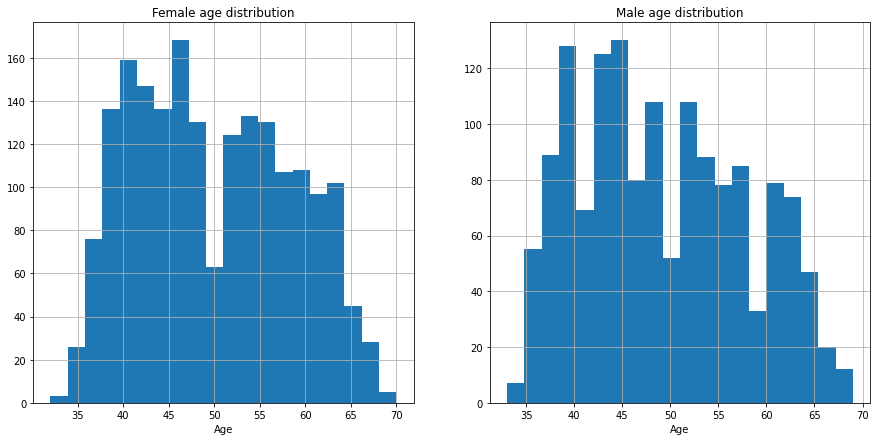

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15,7))

ax[0].hist(cardio_risk_df[cardio_risk_df['sex'] == 'F']['age'],bins=20)
ax[0].set_title('Female age distribution')
ax[0].set_xlabel('Age')
ax[0].grid()

ax[1].hist(cardio_risk_df[cardio_risk_df['sex'] == 'M']['age'],bins=20)
ax[1].set_title('Male age distribution')
ax[1].set_xlabel('Age')
ax[1].grid()

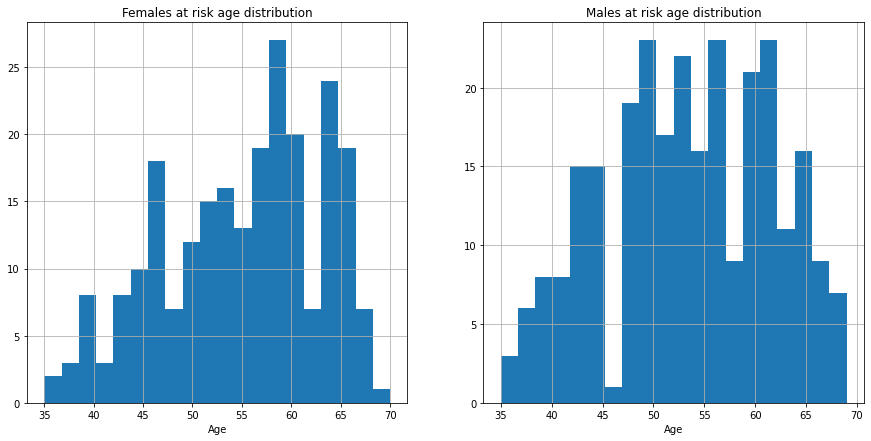

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15,7))

ax[0].hist(cardio_risk_df[(cardio_risk_df['sex'] == 'F') & (cardio_risk_df['TenYearCHD'] == 1)]['age'],bins=20)
ax[0].set_title('Females at risk age distribution')
ax[0].set_xlabel('Age')
ax[0].grid()

ax[1].hist(cardio_risk_df[(cardio_risk_df['sex'] == 'M') & (cardio_risk_df['TenYearCHD'] == 1)]['age'],bins=20)
ax[1].set_title('Males at risk age distribution')
ax[1].set_xlabel('Age')
ax[1].grid()

In [ ]:
cardio_risk_df.groupby(['sex']).agg({'TenYearCHD':'count'}).rename(columns={'TenYearCHD':'Count'})

,Count
sex,
F,1923
M,1467


In [ ]:
cardio_risk_df.groupby(['sex','TenYearCHD']).agg({'education':'count'}).rename(columns={'education':'Count'})

Count
sex TenYearCHD       
F   0            1644
    1             237
M   0            1161
    1             261

* #### Number of males (1467) in the study are less than females (1923), but the count of males at risk (261) of TenYearCHD is greater than females (237). Males might be at more risk.

In [ ]:
cardio_risk_df.groupby(['sex','education']).agg({'TenYearCHD':'count'}).rename(columns={'TenYearCHD':'Count'})

Count
sex education       
F   1.0          773
    2.0          591
    3.0          366
    4.0          151
M   1.0          618
    2.0          399
    3.0          183
    4.0          222

* #### For both 'Males' & 'Females', education level '1.0' seems to be more prevalent and the prvalency decreases as it goes till education level '4.0'. This might be an inducator of '1.0' being a basic education level, with the education level increasing going till '4.0'.
* #### Since, most of the peole have education level '1.0', missing values will be filled by the mode. 

In [ ]:
cardio_risk_df[cardio_risk_df['education'].isna()]

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
49,46,NaN,F,YES,20.0,0.0,0,0,0,212.0,122.5,75.5,23.51,67.0,103.0,0
62,52,NaN,F,NO,0.0,0.0,0,0,0,268.0,109.0,70.0,23.74,75.0,78.0,0
69,65,NaN,M,NO,0.0,0.0,0,0,0,NaN,152.5,97.5,28.35,65.0,73.0,0
104,57,NaN,F,NO,0.0,1.0,0,1,0,190.0,155.0,85.0,26.08,55.0,66.0,0
120,65,NaN,F,NO,0.0,0.0,0,0,0,221.0,155.0,92.0,31.34,58.0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3045,52,NaN,M,NO,0.0,0.0,0,0,1,232.0,130.0,74.0,32.52,95.0,248.0,1
3053,59,NaN,F,NO,0.0,0.0,0,0,0,281.0,139.0,82.0,29.51,80.0,75.0,0
3252,48,NaN,M,YES,9.0,0.0,0,1,0,203.0,117.5,92.0,27.75,80.0,115.0,0
3322,45,NaN,F,YES,30.0,0.0,0,0,0,203.0,131.0,85.0,23.47,94.0,70.0,0


## **Smoking and Cigarettes per day:**

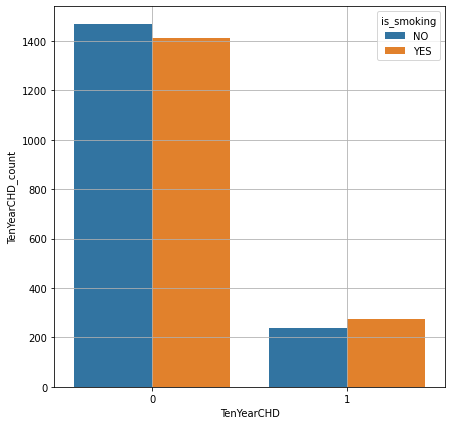

In [ ]:
plt.figure(figsize=(7, 7))
chd_is_smoking_df = cardio_risk_df.groupby(['TenYearCHD','is_smoking']).agg({'prevalentStroke':'count'}).reset_index().rename(columns={'prevalentStroke':'TenYearCHD_count'})

sns.barplot(x='TenYearCHD',y='TenYearCHD_count',hue='is_smoking',data=chd_is_smoking_df)
plt.grid()

* #### The count of people who have 'TenYearCHD' risk and are 'smoking', is slightly higher than 'non-smoking' people.

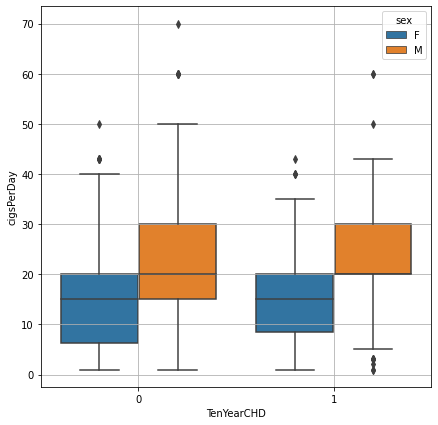

In [ ]:
cigs_df = cardio_risk_df[cardio_risk_df['is_smoking'] == 'YES']

plt.figure(figsize=(7, 7))
sns.boxplot(x='TenYearCHD',y='cigsPerDay',hue='sex',data = cigs_df)
plt.grid()

In [ ]:
cardio_risk_df[cardio_risk_df['is_smoking'] == 'YES'].groupby(['TenYearCHD','is_smoking','sex']).agg({'cigsPerDay':{'mean','median'}}).reset_index()

TenYearCHD is_smoking sex cigsPerDay       
                                  mean median
0          0        YES   F  13.921365   15.0
1          0        YES   M  21.729428   20.0
2          1        YES   F  15.043478   15.0
3          1        YES   M  23.071429   20.0

In [ ]:
cardio_risk_df[cardio_risk_df['cigsPerDay'].isna()].shape[0]

22

* #### All of the missing values in 'cigsPerDay' belong to 'is_smoking' == 'YES' category.
* #### After checking 'cigsPerDay' (for those who smoke) distribution against 'TenYearCHD' risk, for both 'Males' & 'Females', it is observed that for both 'risk' and 'non-risk' people, the median cigarettes per day is higher for 'Males'. 

## **Cholesterol:**

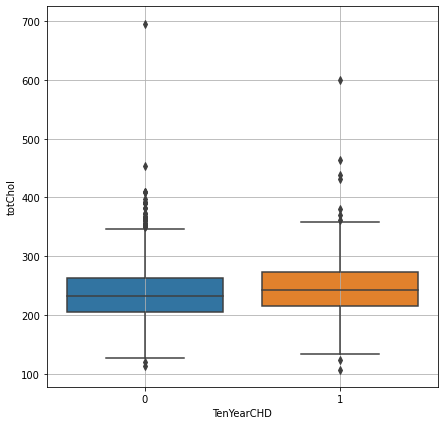

In [ ]:
plt.figure(figsize=(7, 7))
sns.boxplot(x= cardio_risk_df['TenYearCHD'], y=cardio_risk_df['totChol'])
plt.grid()

In [ ]:
cardio_risk_df.groupby(['TenYearCHD']).agg({'totChol':{'mean','median'}})

totChol            
            median        mean
TenYearCHD                    
0            232.0  235.279494
1            243.0  247.216270

* #### In medical field, it is generally known that total cholestrol levels in the range of 200-239 is considered 'Borderline' whereas >239, it is considered high/risky. This is being observed above, where both mean & median, for those not having ten year CHD, are lesser than 239 and greater than 239 for those with ten year CHD risk.

In [ ]:
cardio_risk_df[cardio_risk_df['totChol'].isna()]

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
10,61,1.0,F,NO,0.0,0.0,0,1,0,NaN,185.0,121.0,35.22,80.0,NaN,0
69,65,NaN,M,NO,0.0,0.0,0,0,0,NaN,152.5,97.5,28.35,65.0,73.0,0
254,52,1.0,F,NO,0.0,0.0,0,0,0,NaN,129.0,83.0,32.57,65.0,NaN,0
290,37,2.0,F,YES,30.0,0.0,0,0,0,NaN,115.0,79.0,28.41,85.0,NaN,0
554,38,3.0,F,YES,3.0,1.0,0,1,0,NaN,125.0,80.0,22.79,98.0,NaN,0
625,62,2.0,F,YES,30.0,0.0,0,0,0,NaN,153.0,60.0,27.47,60.0,NaN,0
700,44,2.0,F,YES,9.0,0.0,0,1,0,NaN,147.5,96.0,30.57,78.0,NaN,1
732,61,1.0,F,NO,0.0,0.0,0,0,0,NaN,115.0,60.0,25.50,76.0,99.0,0
797,58,1.0,M,NO,0.0,0.0,0,0,0,NaN,116.5,71.0,27.04,70.0,86.0,0
808,47,2.0,F,YES,20.0,0.0,0,0,0,NaN,121.0,70.0,23.09,80.0,83.0,0


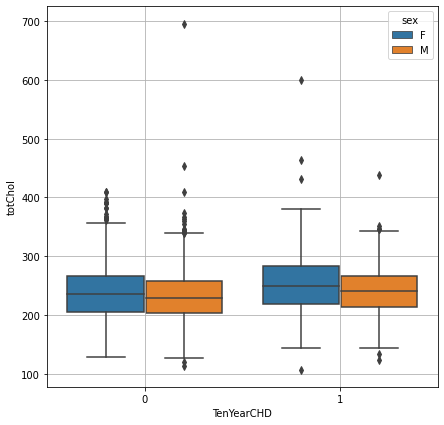

In [ ]:
plt.figure(figsize=(7, 7))
sns.boxplot(x= cardio_risk_df['TenYearCHD'], y=cardio_risk_df['totChol'], hue = cardio_risk_df['sex'])
plt.grid()

In [ ]:
cardio_risk_df.groupby(['TenYearCHD','sex']).agg({'totChol':{'mean','median'}})

totChol            
                median        mean
TenYearCHD sex                    
0          F     235.0  237.894260
           M     229.0  231.652137
1          F     250.0  254.141631
           M     240.0  241.261993

* #### Further disecting cholestrol for both 'tenYearCHD' risk [0,1] on 'sex', for non-risk patients, median for females is 235 and for males is 229. For on 'risk' patients, median for females is 250, whereas for males it is 240.

* #### Overall, cholestrol levels of females are higher than males in both 'non-risk' & 'risk' patients.

## **Blood Pressure (Systolic & Diastolic) & Heart Rate:**

Text(0.5, 1.0, 'Heart Rate vs Ten Year CHD risk')

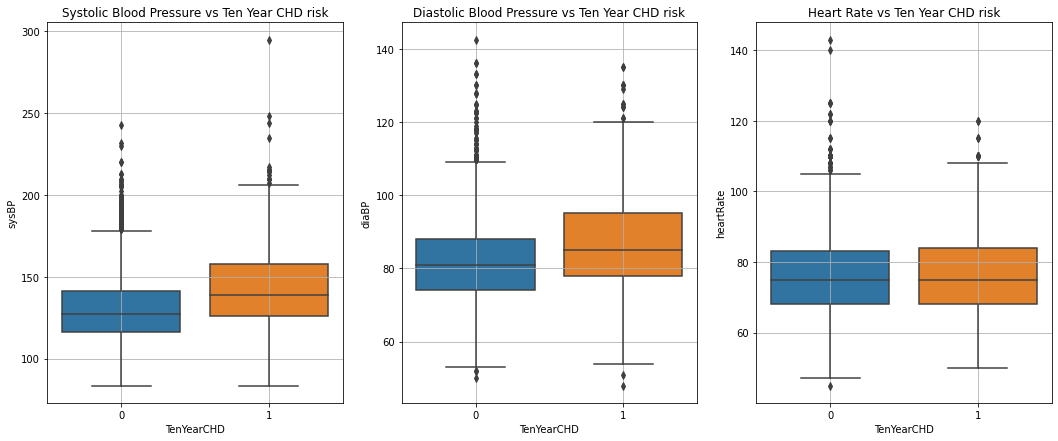

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(18,7))

sns.boxplot(x= cardio_risk_df['TenYearCHD'], y=cardio_risk_df['sysBP'],ax=ax[0])
ax[0].grid()
ax[0].set_title('Systolic Blood Pressure vs Ten Year CHD risk')

sns.boxplot(x= cardio_risk_df['TenYearCHD'], y=cardio_risk_df['diaBP'],ax=ax[1])
ax[1].grid()
ax[1].set_title('Diastolic Blood Pressure vs Ten Year CHD risk')

sns.boxplot(x= cardio_risk_df['TenYearCHD'], y=cardio_risk_df['heartRate'],ax=ax[2])
ax[2].grid()
ax[2].set_title('Heart Rate vs Ten Year CHD risk')

In [ ]:
cardio_risk_df.groupby(['TenYearCHD']).agg({'sysBP':{'mean','median'} , 'diaBP':{'mean','median'}, 'heartRate':{'mean','median'}})

sysBP              diaBP            heartRate           
           median        mean median       mean    median       mean
TenYearCHD                                                          
0           127.0  130.603856   81.0  82.194338      75.0  75.875304
1           139.0  143.854207   85.0  86.763209      75.0  76.552941

In [ ]:
cardio_risk_df[cardio_risk_df['heartRate'].isna()]

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1388,64,1.0,M,YES,18.0,0.0,0,1,0,219.0,172.5,75.0,29.29,NaN,91.0,1


* #### The median 'Systolic Blood Pressure' & 'Diastolic Blood Pressure' for people with 'TenYearCHD' risk is higher (139/85) than 'non-risk' people (127/81).
* #### The median 'Heart Rate' for both 'risk' and 'non-risk' people are equal (75 bpm).

## **Body Mass Index (BMI):**

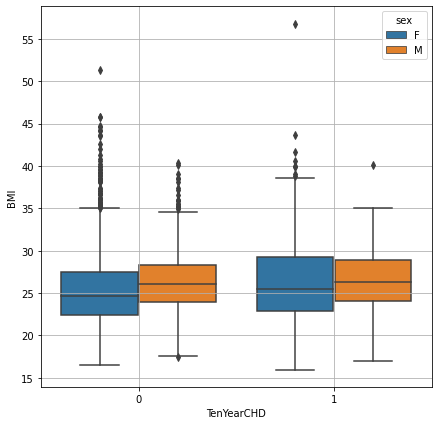

In [ ]:
plt.figure(figsize=(7, 7))
sns.boxplot(x= cardio_risk_df['TenYearCHD'], y=cardio_risk_df['BMI'],hue=cardio_risk_df['sex'])
plt.grid()

In [ ]:
cardio_risk_df[cardio_risk_df['BMI'].isna()]

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
54,63,1.0,M,YES,20.0,0.0,1,1,0,213.0,163.0,94.0,NaN,76.0,69.0,1
271,47,2.0,F,NO,0.0,0.0,0,0,0,195.0,126.0,75.0,NaN,60.0,NaN,1
720,61,1.0,F,NO,0.0,0.0,0,1,0,300.0,150.5,89.0,NaN,68.0,72.0,1
1057,64,2.0,M,YES,20.0,0.0,0,0,0,225.0,120.0,75.0,NaN,70.0,94.0,0
1875,47,1.0,F,YES,25.0,0.0,0,1,1,258.0,195.0,90.0,NaN,86.0,NaN,1
1895,38,4.0,M,YES,20.0,0.0,0,0,0,215.0,110.0,80.0,NaN,100.0,73.0,0
1947,65,1.0,M,NO,0.0,0.0,0,1,1,240.0,235.0,100.0,NaN,68.0,297.0,1
2231,70,1.0,F,NO,0.0,0.0,1,1,0,107.0,143.0,93.0,NaN,68.0,62.0,1
2385,58,1.0,F,YES,1.0,0.0,0,1,0,244.0,160.5,98.0,NaN,86.0,69.0,0


In [ ]:
bmi_df = cardio_risk_df.groupby(['TenYearCHD','sex']).agg({'BMI':'median'}).rename(columns={'BMI':'BMI_median'})
bmi_df

BMI_median
TenYearCHD sex            
0          F        24.580
           M        26.085
1          F        25.520
           M        26.340

## **Diabetes & Glucose:**

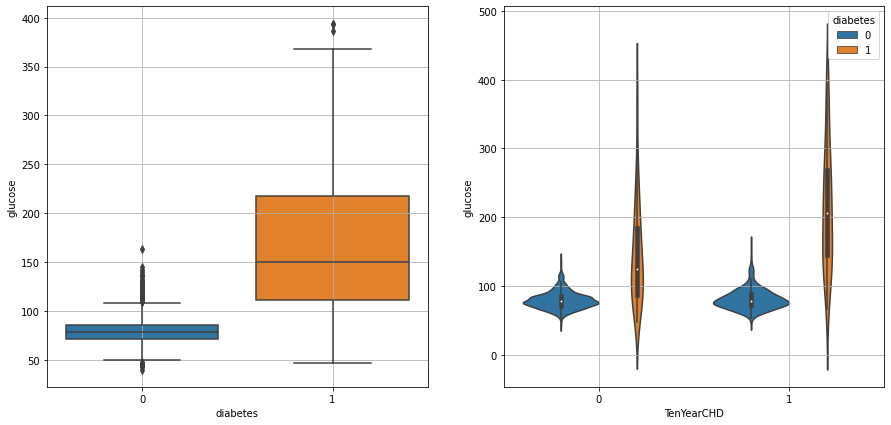

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15,7))
sns.boxplot(x= cardio_risk_df['diabetes'], y=cardio_risk_df['glucose'],ax=ax[0])
ax[0].grid()

sns.violinplot(x= cardio_risk_df['TenYearCHD'], y=cardio_risk_df['glucose'],hue=cardio_risk_df['diabetes'],ax=ax[1])
ax[1].grid()

In [ ]:
# checking glucose NaN values by diabetes (0,1)
cardio_risk_df[(cardio_risk_df['glucose'].isna()) & (cardio_risk_df['diabetes'] ==1)] #.diabetes.value_counts()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
798,47,3.0,M,NO,0.0,0.0,0,0,1,199.0,161.0,102.0,29.17,58.0,NaN,0
1138,50,3.0,F,YES,9.0,0.0,0,0,1,210.0,134.0,80.0,18.26,64.0,NaN,0
1875,47,1.0,F,YES,25.0,0.0,0,1,1,258.0,195.0,90.0,NaN,86.0,NaN,1


In [ ]:
cardio_risk_df.groupby(['TenYearCHD','diabetes']).agg({'glucose':{'median','mean','count'}})

glucose                  
                     median count        mean
TenYearCHD diabetes                          
0          0           78.0  2562   79.312256
           1          124.5    52  147.211538
1          0           78.0   440   81.081818
           1          206.0    32  212.187500

* #### Maximum of the 'NaN' values in glucose feature belongs 'diabetes'==0, ie non diabetic people, so missing values of glucose will be filled by median across diabetic and non diabetic. 

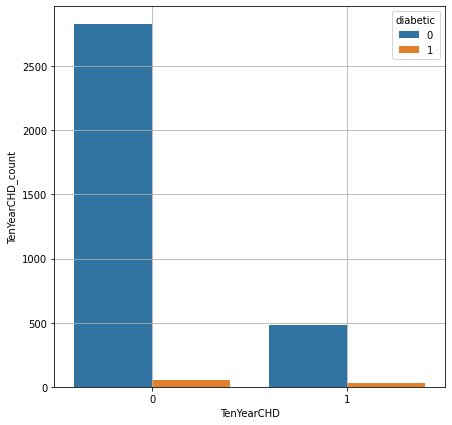

In [ ]:
plt.figure(figsize=(7,7))
chd_diabetic_df = cardio_risk_df.groupby(['TenYearCHD','diabetes']).agg({'is_smoking':'count'}).reset_index().rename(columns={'is_smoking':'TenYearCHD_count','diabetes':'diabetic'})

sns.barplot(x='TenYearCHD',y='TenYearCHD_count',hue='diabetic',data=chd_diabetic_df)
plt.grid()

In [ ]:
cardio_risk_df.groupby(['TenYearCHD','diabetes']).agg({'glucose':'count'}).rename(columns={'glucose':'Count'})

Count
TenYearCHD diabetes       
0          0          2562
           1            52
1          0           440
           1            32

* #### Majority of the people with 'TenYearCHD' risk are non diabetic (440).

## **BP Meds and Prevalent Hypertension:**

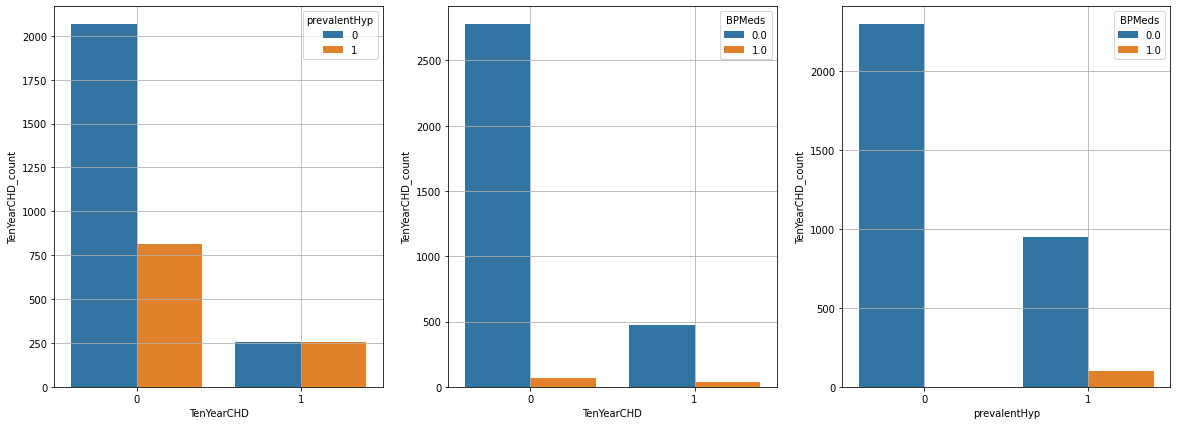

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(20,7))

chd_prevalentHyp_df = cardio_risk_df.groupby(['TenYearCHD','prevalentHyp']).agg({'is_smoking':'count'}).reset_index().rename(columns={'is_smoking':'TenYearCHD_count'})

chd_bp_meds_df = cardio_risk_df.groupby(['TenYearCHD','BPMeds']).agg({'is_smoking':'count'}).reset_index().rename(columns={'is_smoking':'TenYearCHD_count'})

hyp_bp_meds_df = cardio_risk_df.groupby(['prevalentHyp','BPMeds']).agg({'is_smoking':'count'}).reset_index().rename(columns={'is_smoking':'TenYearCHD_count'})

sns.barplot(x='TenYearCHD',y='TenYearCHD_count',hue='prevalentHyp',data=chd_prevalentHyp_df,ax=ax[0])
ax[0].grid()

sns.barplot(x='TenYearCHD',y='TenYearCHD_count',hue='BPMeds',data=chd_bp_meds_df,ax=ax[1])
ax[1].grid()

sns.barplot(x='prevalentHyp',y='TenYearCHD_count',hue='BPMeds',data=hyp_bp_meds_df,ax=ax[2])
ax[2].grid()

In [ ]:
# checking BPMeds NaN values 
cardio_risk_df[cardio_risk_df['BPMeds'].isna()].TenYearCHD.value_counts()

0    37
1     7
Name: TenYearCHD, dtype: int64

* #### 'BPMeds' is a binary feature indicating whether the concerned person has been taking any Blood Pressure related medication. 

* #### Majority of the persons **with 'TenYearCHD' risk (1), have not been taking 'BPMeds'** (middle barplot above).

* #### 'BPMeds' feature has 44 'NaN' values, out of which 37 DO NOT have 'TenYearCHD' risk (0) and 7 have (1). For both, from the middle barplot we see that majority of them have not been taking any medication prior, so the missing values will be filled by the mode here, which is 0. 

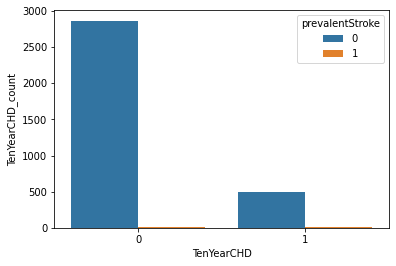

In [ ]:
chd_prevalentStroke_df = cardio_risk_df.groupby(['TenYearCHD','prevalentStroke']).agg({'is_smoking':'count'}).reset_index().rename(columns={'is_smoking':'TenYearCHD_count'})

sns.barplot(x='TenYearCHD',y='TenYearCHD_count',hue='prevalentStroke',data=chd_prevalentStroke_df)

In [9]:
# CONVERTING CATEGORICAL 'is_smoking' and 'sex' to BINARY variables: 

cardio_risk_df['is_smoking'] = cardio_risk_df['is_smoking'].apply(lambda x: 1 if x=='YES' else 0)
cardio_risk_df['sex'] = cardio_risk_df['sex'].apply(lambda x: 1 if x=='F' else 0)

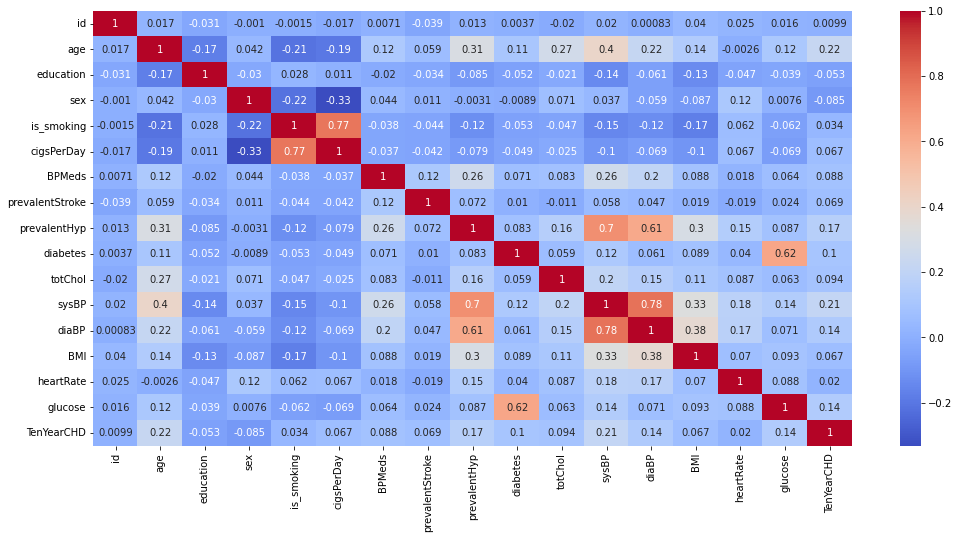

In [ ]:
# CORRELATION CHART:
plt.figure(figsize=(17,8))
correlation = cardio_risk_df.corr()
sns.heatmap((correlation), annot=True, cmap='coolwarm')

In [11]:
# CREATING COPY of cardio_risk_df

cardio_risk_df1 = cardio_risk_df.copy()

In [12]:
# SEPARATING DEPENDENT/TARGET AND INDEPENDENT VARIABLES

X = cardio_risk_df1.drop(['TenYearCHD','id'],axis=1).copy()
Y = cardio_risk_df1['TenYearCHD'].copy()

In [13]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split( X,Y , test_size = 0.30,shuffle = True ,random_state = 3, stratify = Y) 
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2373, 15)
(1017, 15)
(2373,)
(1017,)


In [14]:
# FUNCTION FOR MISSING VALUE IMPUTATION:

def missing_val_imputation(x_train,x_test):
  x_tr = x_train
  x_tst = x_test

  ''' REPLACING MISSING VALUES IN 'education' & 'BPMeds' by their mode in training set, using SIMPLE IMPUTER with most_frequent strategy: '''

  from sklearn.impute import SimpleImputer

  mode_imputer = SimpleImputer(missing_values = np.nan,
                          strategy ='most_frequent')

  # fit_transform train set :
  x_tr_imp_mode = pd.DataFrame(mode_imputer.fit_transform(x_tr[['education','BPMeds']]), columns = ['education','BPMeds']).set_index(x_tr.index)

  # transform test set:
  x_tst_imp_mode = pd.DataFrame(mode_imputer.transform(x_tst[['education','BPMeds']]), columns = ['education','BPMeds']).set_index(x_tst.index)  


  # REPLACING old missing data with new imputed data:    #

  x_tr = pd.concat([x_tr.drop(['education','BPMeds'],axis=1), x_tr_imp_mode], join='outer',axis=1)

  x_tst = pd.concat([x_tst.drop(['education','BPMeds'],axis=1), x_tst_imp_mode], join='outer',axis=1)

  #----------------------------------------------------------------------------------------------------------------------------------------------------------------#


  ''' REPLACING MISSING VALUES in REMAINING COLUMNS, using KNN IMPUTER : '''

  knn_columns = ['age', 'sex', 'is_smoking', 'cigsPerDay', 'prevalentStroke','prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI','heartRate', 'glucose']

  from sklearn.impute import KNNImputer

  knn_imputer = KNNImputer(n_neighbors=10,weights='distance')

  # fit_transform train set :
  x_tr_knn_imp = pd.DataFrame(knn_imputer.fit_transform(x_tr[knn_columns]), columns = knn_columns).set_index(x_tr.index)

  # transform test set:
  x_tst_knn_imp = pd.DataFrame(knn_imputer.transform(x_tst[knn_columns]), columns = knn_columns).set_index(x_tst.index)

  # REPLACING old missing data with new imputed data:    #

  x_tr = pd.concat([x_tr.drop(knn_columns,axis=1), x_tr_knn_imp], join='outer',axis=1)

  x_tst = pd.concat([x_tst.drop(knn_columns,axis=1), x_tst_knn_imp], join='outer',axis=1)


  return x_tr, x_tst

In [15]:
# STORING MISSING VALUE IMPUTED TRAIN AND TEST SETS IN NEW SET:

x_train_imp, x_test_imp = missing_val_imputation(x_train,x_test)

In [16]:
x_train_imp.head()

,education,BPMeds,age,sex,is_smoking,cigsPerDay,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
3030,1.0,0.0,50.0,0.0,0.0,0.0,0.0,1.0,0.0,227.00000,152.0,99.0,29.46,78.0,115.000000
2732,4.0,0.0,57.0,0.0,0.0,0.0,0.0,0.0,0.0,194.00000,133.0,78.0,29.02,72.0,92.000000
2027,2.0,0.0,47.0,1.0,1.0,6.0,0.0,0.0,0.0,234.00000,128.0,91.0,25.59,80.0,93.000000
625,2.0,0.0,62.0,1.0,1.0,30.0,0.0,0.0,0.0,260.14915,153.0,60.0,27.47,60.0,82.263177
2378,1.0,1.0,66.0,1.0,0.0,0.0,0.0,1.0,0.0,290.00000,152.5,90.0,23.63,80.0,76.000000


In [17]:
# checking for null values in train set
null_value_features = x_train_imp.isna().sum().reset_index()
null_value_features = null_value_features[null_value_features[0] != 0].reset_index().drop('level_0',axis=1)
null_value_features

,index,0


In [18]:
# checking for null values in test set
null_value_features = x_test_imp.isna().sum().reset_index()
null_value_features = null_value_features[null_value_features[0] != 0].reset_index().drop('level_0',axis=1)
null_value_features

,index,0


In [19]:
# PRE-PROCESSING FUNCTION for non tree based models:

def non_tree_preprocessing(x_train_imp,x_test_imp):
  x_train_non_tree = x_train_imp.copy()
  x_test_non_tree = x_test_imp.copy()

  ''' dropping diastolic blood pressure 'diaBP', as it is highly correlated with systolic blood pressure '''

  x_train_non_tree = x_train_non_tree.drop(['diaBP'],axis=1)
  x_test_non_tree = x_test_non_tree.drop(['diaBP'],axis=1)


  ''' getting one hot encodings '''

  x_train_non_tree = pd.get_dummies(x_train_non_tree, columns=["education"], prefix=["education"])

  x_test_non_tree = pd.get_dummies(x_test_non_tree, columns=["education"], prefix=["education"])


  
  ''' Separating numerical and categorical features in both train & test set, in order to SCALE only on numerical variables: '''

  num_feature = ['age','cigsPerDay','totChol','sysBP','BMI','glucose']
  cat_feature = ['diabetes','prevalentHyp','is_smoking','sex','education_2.0','education_3.0','education_4.0']

  x_train_non_tree_num = x_train_non_tree[num_feature].copy()
  x_train_non_tree_cat = x_train_non_tree[cat_feature].copy()

  x_test_non_tree_num = x_test_non_tree[num_feature].copy()
  x_test_non_tree_cat = x_test_non_tree[cat_feature].copy()

  from sklearn.preprocessing import StandardScaler

  scaler = StandardScaler()
  scaler.fit(x_train_non_tree_num)

  x_train_non_tree_num = pd.DataFrame(scaler.transform(x_train_non_tree_num),index = x_train_non_tree_num.index, columns = x_train_non_tree_num.columns)
  x_test_non_tree_num = pd.DataFrame(scaler.transform(x_test_non_tree_num),index = x_test_non_tree_num.index, columns = x_test_non_tree_num.columns)


  ''' concatenate NORMALIZED train and test set with their respective categotical features: '''
  x_train_non_tree = pd.concat([x_train_non_tree_num, x_train_non_tree_cat], axis=1, join='inner')
  x_test_non_tree = pd.concat([x_test_non_tree_num, x_test_non_tree_cat], axis=1, join='inner')

  return x_train_non_tree, x_test_non_tree

In [20]:
x_train_non_tree, x_test_non_tree  = non_tree_preprocessing(x_train_imp,x_test_imp)

In [21]:
x_train_non_tree.head()

,age,cigsPerDay,totChol,sysBP,BMI,glucose,diabetes,prevalentHyp,is_smoking,sex,education_2.0,education_3.0,education_4.0
3030,0.049399,-0.760802,-0.224549,0.892245,0.885182,1.446565,0.0,1.0,0.0,0.0,0,0,0
2732,0.857050,-0.760802,-0.964745,0.025724,0.777909,0.438673,0.0,0.0,0.0,0.0,0,0,1
2027,-0.296737,-0.253566,-0.067537,-0.202307,-0.058330,0.482495,0.0,0.0,1.0,1.0,1,0,0
625,1.433944,1.775377,0.518993,0.937852,0.400017,0.011992,0.0,0.0,1.0,1.0,1,0,0
2378,1.895458,-0.760802,1.188553,0.915049,-0.536181,-0.262469,0.0,1.0,0.0,1.0,0,0,0


In [22]:
# handling class imbalance using SMOTENC

from imblearn.over_sampling import SMOTENC

sm = SMOTENC(random_state=42, categorical_features = [6,7,8,9,10,11,12])
x_train_non_tree_smt, y_train_smt = sm.fit_resample(x_train_non_tree, y_train)

In [23]:
x_train_non_tree_smt.shape[0]

4030

In [ ]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)

x_train_non_tree_ros, y_train_ros = ros.fit_resample(x_train_non_tree, y_train)

In [24]:
y_train_smt.value_counts()

0    2015
1    2015
Name: TenYearCHD, dtype: int64

In [25]:
import statsmodels.api as sm

log_reg = sm.Logit(y_train_smt,x_train_non_tree_smt).fit()

print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.573448
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:             TenYearCHD   No. Observations:                 4030
Model:                          Logit   Df Residuals:                     4017
Method:                           MLE   Df Model:                           12
Date:                Tue, 05 Jul 2022   Pseudo R-squ.:                  0.1727
Time:                        10:12:41   Log-Likelihood:                -2311.0
converged:                       True   LL-Null:                       -2793.4
Covariance Type:            nonrobust   LLR p-value:                6.976e-199
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
age               0.5005      0.042     11.816      0.000       0.418       0.584
cigsPerDay        0.

In [26]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(fit_intercept=True, max_iter=11000)
clf.fit(x_train_non_tree_smt, y_train_smt)

LogisticRegression(max_iter=11000)

In [27]:
clf.coef_

array([[ 0.4396045 ,  0.32001392,  0.18411143,  0.26879458, -0.1477695 ,
         0.26325747, -0.67494597,  0.03619709, -0.09742799, -0.39424542,
        -1.11146515, -1.46487877, -1.56053701]])

In [28]:
clf.intercept_

array([0.56287967])

In [29]:
# Get the predicted probabilities 
train_preds = clf.predict(x_train_non_tree_smt)
test_preds = clf.predict(x_test_non_tree)

In [30]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

In [31]:
# Get the accuracy scores 
train_accuracy = accuracy_score(train_preds,y_train_smt)
test_accuracy = accuracy_score(test_preds,y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.7069478908188586
The accuracy on test data is  0.6607669616519174


[[1381  634]
 [ 547 1468]]


[Text(0, 0.5, 'No Risk'), Text(0, 1.5, 'Risk')]

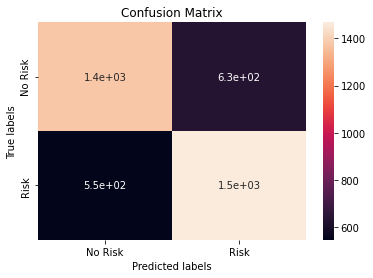

In [32]:
# Get the confusion matrix for both train and test

labels = ['No Risk', 'Risk']
cm = confusion_matrix(y_train_smt, train_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[584 280]
 [ 65  88]]


[Text(0, 0.5, 'No Risk'), Text(0, 1.5, 'Risk')]

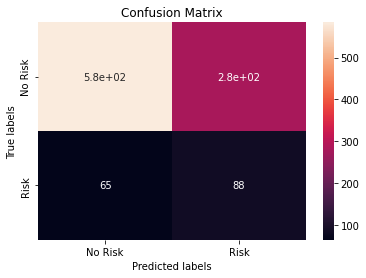

In [33]:
# Get the confusion matrix for both train and test

labels = ['No Risk', 'Risk']
cm = confusion_matrix(y_test, test_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
from imblearn.over_sampling import SMOTE 

sm = SMOTE(random_state=42)
x_train_knn_smt, y_train_smt = sm.fit_resample(x_train_knn, y_train)

In [ ]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)

x_train_non_tree_ros, y_train_ros = ros.fit_resample(x_train_non_tree, y_train)

In [ ]:
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,100)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    # Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k,p=1)
    
    # Fit the model
    knn.fit(x_train_non_tree_smt, y_train_smt)
    
    # Compute accuracy on the training set
    train_accuracy[i] = knn.score(x_train_non_tree_smt, y_train_smt)
    
    # Compute accuracy on the test set
    test_accuracy[i] = knn.score(x_test_non_tree, y_test) 

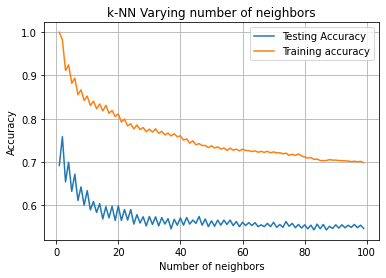

In [ ]:
# Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

In [ ]:
# Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=70)

In [ ]:
# Fit the model
knn.fit(x_train_non_tree_smt, y_train_smt)

KNeighborsClassifier(n_neighbors=70)

In [ ]:
knn.score(x_test_non_tree, y_test)

0.5417017691659646

In [ ]:
# Import confusion_matrix
from sklearn.metrics import confusion_matrix,roc_curve

In [ ]:
# Let us get the predictions using the classifier we had fit above
y_pred_test = knn.predict(x_test_non_tree)
y_pred_train = knn.predict(x_train_non_tree_smt)

In [ ]:
# train confusion matrix

confusion_matrix(y_train_smt,y_pred_train)

array([[1022,  849],
       [ 236, 1635]])

In [ ]:
# test confusion matrix

confusion_matrix(y_test,y_pred_test)

array([[515, 493],
       [ 51, 128]])

In [ ]:
from sklearn.svm import SVC

clf = SVC(kernel='rbf', C=0.005)
clf.fit(x_train_non_tree_smt, y_train_smt)

SVC(C=0.005)

In [ ]:
clf.score(x_train_non_tree_smt, y_train_smt)

0.6571352218065206

In [ ]:
y_pred_test = clf.predict(x_test_non_tree)
y_pred_train = clf.predict(x_train_non_tree_smt)

In [ ]:
# train confusion matrix

confusion_matrix(y_train_smt,y_pred_train)

array([[1074,  797],
       [ 486, 1385]])

In [ ]:
# test confusion matrix

confusion_matrix(y_test,y_pred_test)

array([[581, 427],
       [ 41, 138]])

In [34]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svm = SVC()

params = {'kernel':['linear','rbf'], 'C':[2.5e-6,5e-6,1e-5,2e-5]}

 
svm_cv = GridSearchCV(estimator=svm,
                       param_grid = params,
                       cv = 5, scoring='roc_auc')

In [35]:
# svm_cv.fit(x_train_non_tree_smt, y_train_smt)

svm_cv.fit(x_train_non_tree_smt, y_train_smt)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [2.5e-06, 5e-06, 1e-05, 2e-05],
                         'kernel': ['linear', 'rbf']},
             scoring='roc_auc')

In [36]:
svm_cv.best_params_

{'C': 2.5e-06, 'kernel': 'rbf'}

In [37]:
y_pred_test = svm_cv.predict(x_test_non_tree)
y_pred_train = svm_cv.predict(x_train_non_tree_smt)

In [38]:
# train confusion matrix

confusion_matrix(y_train_smt,y_pred_train)

array([[1183,  832],
       [ 534, 1481]])

In [39]:
# test confusion matrix

confusion_matrix(y_test,y_pred_test)

array([[513, 351],
       [ 35, 118]])

In [40]:
# Get the accuracy scores 
train_accuracy = accuracy_score(y_pred_train,y_train_smt)
test_accuracy = accuracy_score(y_pred_test,y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.6610421836228287
The accuracy on test data is  0.6204523107177975


In [42]:
x_train_imp.head()

,education,BPMeds,age,sex,is_smoking,cigsPerDay,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
3030,1.0,0.0,50.0,0.0,0.0,0.0,0.0,1.0,0.0,227.00000,152.0,99.0,29.46,78.0,115.000000
2732,4.0,0.0,57.0,0.0,0.0,0.0,0.0,0.0,0.0,194.00000,133.0,78.0,29.02,72.0,92.000000
2027,2.0,0.0,47.0,1.0,1.0,6.0,0.0,0.0,0.0,234.00000,128.0,91.0,25.59,80.0,93.000000
625,2.0,0.0,62.0,1.0,1.0,30.0,0.0,0.0,0.0,260.14915,153.0,60.0,27.47,60.0,82.263177
2378,1.0,1.0,66.0,1.0,0.0,0.0,0.0,1.0,0.0,290.00000,152.5,90.0,23.63,80.0,76.000000


In [44]:
# handling class imbalance using SMOTE

from imblearn.over_sampling import SMOTENC

sm = SMOTENC(random_state=42,categorical_features = [0,1,3,4,6,7,8])
x_train_tree_smt, y_train_tree_smt = sm.fit_resample(x_train_imp, y_train)

In [ ]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)

x_train_tree_ros, y_train_ros = ros.fit_resample(x_train_imp, y_train)

In [114]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier() # For GBM, use GradientBoostingClassifier()
grid_values = {'n_estimators':[41,42,43], 'max_depth':[2,3], 'min_samples_split':[18,19,20], 'min_samples_leaf':[5,6,7],'max_features':[12,13]}
classifier = GridSearchCV(classifier, param_grid = grid_values, scoring = 'roc_auc', cv=5)

# Fit the object to train dataset
classifier.fit(x_train_tree_smt, y_train_tree_smt)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 3], 'max_features': [12, 13],
                         'min_samples_leaf': [5, 6, 7],
                         'min_samples_split': [18, 19, 20],
                         'n_estimators': [41, 42, 43]},
             scoring='roc_auc')

In [115]:
classifier.best_params_

{'max_depth': 3,
 'max_features': 13,
 'min_samples_leaf': 6,
 'min_samples_split': 19,
 'n_estimators': 41}

In [116]:
train_preds =  classifier.predict(x_train_tree_smt)
test_preds  = classifier.predict(x_test_imp)

In [117]:
accuracy_score(y_train_tree_smt,train_preds)

0.6982630272952853

In [118]:
accuracy_score(y_test,test_preds)

0.6204523107177975

In [119]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_tree_smt,train_preds)

0.6982630272952853

In [120]:
# Obtain the confusion matrix on train set
confusion_matrix(y_train_tree_smt,train_preds)

array([[1230,  785],
       [ 431, 1584]])

In [121]:
# Obtain the confusion matrix on test set
confusion_matrix(y_test,test_preds)

array([[524, 340],
       [ 46, 107]])

<Figure size 576x576 with 0 Axes>

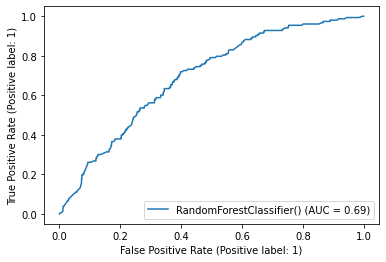

In [122]:
from sklearn.metrics import plot_roc_curve, roc_curve

plt.figure(figsize=(8,8))
plot_roc_curve(classifier,x_test_imp, y_test, name=classifier.estimator)

In [ ]:
type(classifier.estimator)

sklearn.ensemble._forest.RandomForestClassifier

In [159]:
from sklearn.ensemble import GradientBoostingClassifier

classifier = GradientBoostingClassifier() # For GBM, use GradientBoostingClassifier()
grid_values ={'n_estimators':[44,45,46], 'max_depth':[1,2], 'min_samples_split':[17,18,19], 'min_samples_leaf':[5,6,7],'max_features':[12,13]}
classifier = GridSearchCV(classifier, param_grid = grid_values, scoring = 'roc_auc', cv=5)

# Fit the object to train dataset
classifier.fit(x_train_tree_smt, y_train_tree_smt)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': [1, 2], 'max_features': [12, 13],
                         'min_samples_leaf': [5, 6, 7],
                         'min_samples_split': [17, 18, 19],
                         'n_estimators': [44, 45, 46]},
             scoring='roc_auc')

In [160]:
classifier.best_params_

{'max_depth': 2,
 'max_features': 13,
 'min_samples_leaf': 5,
 'min_samples_split': 18,
 'n_estimators': 46}

In [161]:
train_preds =  classifier.predict(x_train_tree_smt)
test_preds  = classifier.predict(x_test_imp)

In [162]:
accuracy_score(y_train_tree_smt,train_preds)

0.7384615384615385

In [163]:
accuracy_score(y_test,test_preds)

0.6656833824975418

In [164]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_tree_smt,train_preds)

0.7384615384615384

In [165]:
roc_auc_score(y_test,test_preds)

0.6391952614379084

In [166]:
# Obtain the confusion matrix on train set
confusion_matrix(y_train_tree_smt,train_preds)

array([[1411,  604],
       [ 450, 1565]])

In [167]:
# Obtain the confusion matrix on test set
confusion_matrix(y_test,test_preds)

array([[585, 279],
       [ 61,  92]])